## Super Fly Project Modeling Steps

In [1]:
# Loading relevant data packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import scipy.stats as stats

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.linear_model import LinearRegression
from tqdm import tqdm

### Step 0: Source Data Information 

Data set is from kaggle and this is the dictionary:

| Updated Header           | Source Header                        | Data Type | Description                                                                    |
|--------------------------|--------------------------------------|-----------|--------------------------------------------------------------------------------|
| FL_DATE                  | FlightDate                           | object    | Flight Date (yyyymmdd)                                                         |
| AIRLINE_CODE             | Reporting_Airline                    | object    | Unique Carrier Code. When the same code has been used by multiple carriers, a numeric suffix is used for earlier users, for example, PA, PA(1), PA(2). Use this field for analysis across a range of years. |
| DOT_CODE                 | DOT_ID_Reporting_Airline             | int64     | An identification number assigned by US DOT to identify a unique airline (carrier). A unique airline (carrier) is defined as one holding and reporting under the same DOT certificate regardless of its Code, Name, or holding company/corporation. |
| FL_NUMBER                | Flight_Number_Reporting_Airline      | int64     | Flight Number                                                                  |
| ORIGIN                   | Origin                               | object    | Origin Airport                                                                 |
| ORIGIN_CITY              | OriginCityName                       | object    | Origin Airport, City Name                                                      |
| DEST                     | Dest                                 | object    | Destination Airport                                                            |
| DEST_CITY                | DestCityName                         | object    | Destination Airport, City Name                                                  |
| CRS_DEP_TIME             | CRSDepTime                           | int64     | CRS Departure Time (local time: hhmm)                                           |
| DEP_TIME                 | DepTime                              | float64   | Actual Departure Time (local time: hhmm)                                        |
| DEP_DELAY                | DepDelay                             | float64   | Difference in minutes between scheduled and actual departure time. Early departures show negative numbers. |
| TAXI_OUT                 | TaxiOut                              | float64   | Taxi Out Time, in Minutes                                                      |
| WHEELS_OFF               | WheelsOff                            | float64   | Wheels Off Time (local time: hhmm)                                              |
| WHEELS_ON                | WheelsOn                             | float64   | Wheels On Time (local time: hhmm)                                               |
| TAXI_IN                  | TaxiIn                               | float64   | Taxi In Time, in Minutes                                                        |
| CRS_ARR_TIME             | CRSArrTime                           | int64     | CRS Arrival Time (local time: hhmm)                                             |
| ARR_TIME                 | ArrTime                              | float64   | Actual Arrival Time (local time: hhmm)                                          |
| ARR_DELAY                | ArrDelay                             | float64   | Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers. |
| CANCELLED                | Cancelled                            | float64   | Cancelled Flight Indicator (1=Yes)                                              |
| CANCELLATION_CODE        | CancellationCode                     | object    | Specifies The Reason For Cancellation                                           |
| DIVERTED                 | Diverted                             | float64   | Diverted Flight Indicator (1=Yes)                                               |
| CRS_ELAPSED_TIME         | CRSElapsedTime                       | float64   | CRS Elapsed Time of Flight, in Minutes                                          |
| ELAPSED_TIME             | ActualElapsedTime                    | float64   | Elapsed Time of Flight, in Minutes                                              |
| AIR_TIME                 | AirTime                              | float64   | Flight Time, in Minutes                                                         |
| DISTANCE                 | Distance                             | float64   | Distance between airports (miles)                                               |
| DELAY_DUE_CARRIER        | CarrierDelay                         | float64   | Carrier Delay, in Minutes                                                       |
| DELAY_DUE_WEATHER        | WeatherDelay                         | float64   | Weather Delay, in Minutes                                                       |
| DELAY_DUE_NAS            | NASDelay                             | float64   | National Air System Delay, in Minutes                                           |
| DELAY_DUE_SECURITY       | SecurityDelay                        | float64   | Security Delay, in Minutes                                                      |
| DELAY_DUE_LATE_AIRCRAFT  | LateAircraftDelay                    | float64   | Late Aircraft Delay, in Minutes                                                 |


### Step 1: Data Preprocessing

Please find, download, and place data into Data folder using the following url: https://www.kaggle.com/datasets/patrickzel/flight-delay-and-cancellation-dataset-2019-2023?resource=download

In [2]:
# Ensure the data has been imported correctly
df = pd.read_csv('Data/flights_sample_3m.csv', low_memory = False)
df.head(5)

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN


In [3]:
#inspect data for any outliers or missing values 
df.describe()

,DOT_CODE,FL_NUMBER,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
count,3.000000e+06,3.000000e+06,3.000000e+06,2.922385e+06,2.922356e+06,2.921194e+06,2.921194e+06,2.920056e+06,2.920056e+06,3.000000e+06,...,3.000000e+06,2.999986e+06,2.913802e+06,2.913802e+06,3.000000e+06,533863.000000,533863.000000,533863.000000,533863.000000,533863.000000
mean,1.997629e+04,2.511536e+03,1.327062e+03,1.329776e+03,1.012333e+01,1.664305e+01,1.352361e+03,1.462500e+03,7.678982e+00,1.490561e+03,...,2.352000e-03,1.422758e+02,1.366205e+02,1.123108e+02,8.093616e+02,24.759086,3.985260,13.164728,0.145931,25.471282
std,3.772846e+02,1.747258e+03,4.858789e+02,4.993101e+02,4.925183e+01,9.192901e+00,5.008727e+02,5.272368e+02,6.269639e+00,5.115476e+02,...,4.844036e-02,7.155669e+01,7.167582e+01,6.975484e+01,5.878939e+02,71.771845,32.410796,33.161122,3.582053,55.766892
min,1.939300e+04,1.000000e+00,1.000000e+00,1.000000e+00,-9.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.000000e+00,1.000000e+00,1.500000e+01,8.000000e+00,2.900000e+01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.979000e+04,1.051000e+03,9.150000e+02,9.160000e+02,-6.000000e+00,1.100000e+01,9.310000e+02,1.049000e+03,4.000000e+00,1.107000e+03,...,0.000000e+00,9.000000e+01,8.400000e+01,6.100000e+01,3.770000e+02,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.993000e+04,2.152000e+03,1.320000e+03,1.323000e+03,-2.000000e+00,1.400000e+01,1.336000e+03,1.501000e+03,6.000000e+00,1.516000e+03,...,0.000000e+00,1.250000e+02,1.200000e+02,9.500000e+01,6.510000e+02,4.000000,0.000000,0.000000,0.000000,0.000000
75%,2.036800e+04,3.797000e+03,1.730000e+03,1.739000e+03,6.000000e+00,1.900000e+01,1.752000e+03,1.908000e+03,9.000000e+00,1.919000e+03,...,0.000000e+00,1.720000e+02,1.670000e+02,1.420000e+02,1.046000e+03,23.000000,0.000000,17.000000,0.000000,30.000000
max,2.045200e+04,9.562000e+03,2.359000e+03,2.400000e+03,2.966000e+03,1.840000e+02,2.400000e+03,2.400000e+03,2.490000e+02,2.400000e+03,...,1.000000e+00,7.050000e+02,7.390000e+02,6.920000e+02,5.812000e+03,2934.000000,1653.000000,1741.000000,1185.000000,2557.000000


In [4]:
# Check for number of null values in data, only showing values over 0
null_counts = df.isnull().sum()
non_zero_nulls = null_counts[null_counts > 0]
print(non_zero_nulls)

DEP_TIME                     77615
DEP_DELAY                    77644
TAXI_OUT                     78806
WHEELS_OFF                   78806
WHEELS_ON                    79944
TAXI_IN                      79944
ARR_TIME                     79942
ARR_DELAY                    86198
CANCELLATION_CODE          2920860
CRS_ELAPSED_TIME                14
ELAPSED_TIME                 86198
AIR_TIME                     86198
DELAY_DUE_CARRIER          2466137
DELAY_DUE_WEATHER          2466137
DELAY_DUE_NAS              2466137
DELAY_DUE_SECURITY         2466137
DELAY_DUE_LATE_AIRCRAFT    2466137
dtype: int64


Apply transformations to existing dataframe: datatype change & adding columns. This will structure the data to be injested by a model.

In [5]:
# Convert 'FL_DATE' column to datetime format
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])

# Split 'FL_DATE' column into year, month, and day columns
df['Year'] = df['FL_DATE'].dt.year
df['Month'] = df['FL_DATE'].dt.month
df['Day'] = df['FL_DATE'].dt.day

# Add delayed column
df["delayed"] = df['ARR_DELAY'].apply(lambda x: 1 if x > 0 else 0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 36 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   FL_DATE                  datetime64[ns]
 1   AIRLINE                  object        
 2   AIRLINE_DOT              object        
 3   AIRLINE_CODE             object        
 4   DOT_CODE                 int64         
 5   FL_NUMBER                int64         
 6   ORIGIN                   object        
 7   ORIGIN_CITY              object        
 8   DEST                     object        
 9   DEST_CITY                object        
 10  CRS_DEP_TIME             int64         
 11  DEP_TIME                 float64       
 12  DEP_DELAY                float64       
 13  TAXI_OUT                 float64       
 14  WHEELS_OFF               float64       
 15  WHEELS_ON                float64       
 16  TAXI_IN                  float64       
 17  CRS_ARR_TIME             in

### Step 3: Multivariate Analysis

This serves to highlight any linkages of the dependent variables to the independent variable. 

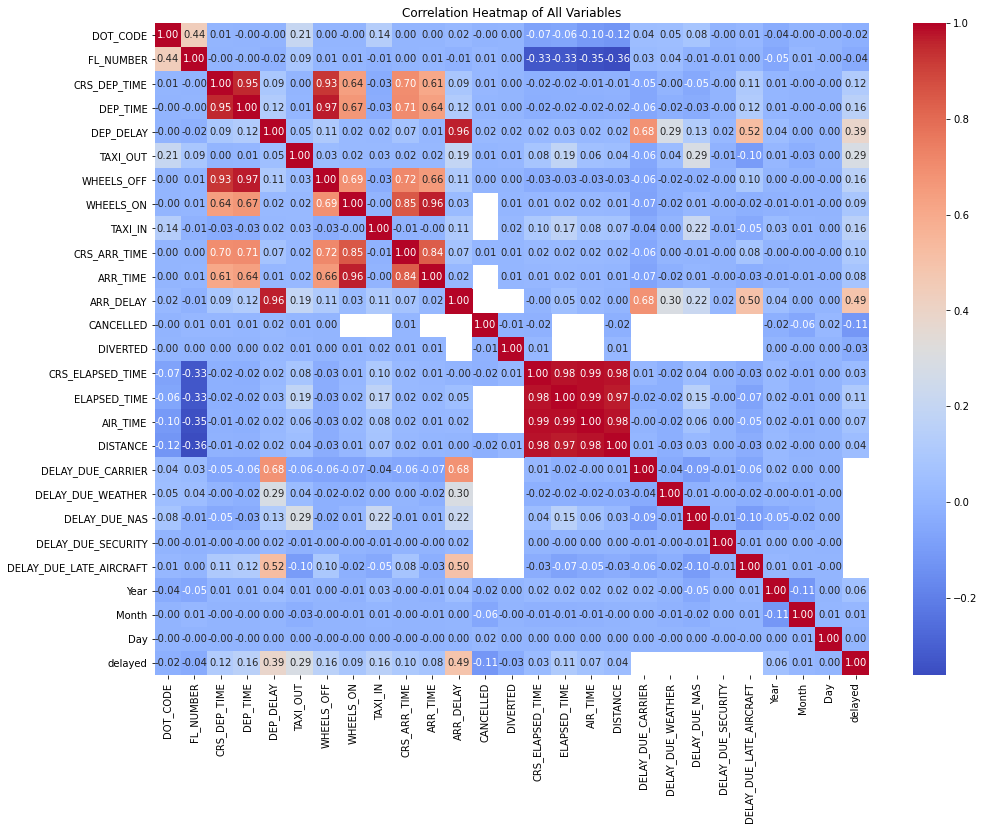

In [7]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Create heatmap
plt.figure(figsize=(16, 12))  # Adjust size of the heatmap if needed
sns.heatmap(correlation_matrix, annot=True, cmap = 'coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of All Variables')
plt.show()

In [8]:
# # Using this for testing purposes
# random_subset = df.sample(n = 10000, random_state = 1)
# random_subset.to_csv("Data/Flight_Subset.csv", index = False)

### Step 4a: ML Model Building - Random Forest Regressor

We will be running two variations of model building. The first is a random forest regressor model that will be able to handle complex relationships. Due to the nature of what we are trying to accomplish, we made sure to only include variables in which a new person flying can use to predict delay times.

In [9]:
%%time
# Separate features and target
X = df[['AIRLINE', 'AIRLINE_CODE', 'DOT_CODE', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY', 'CRS_DEP_TIME', 'DISTANCE', 'Year', 'Month', 'Day']]
y = df['ARR_DELAY']

# Split into training and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size = 0.003, random_state = 42)

# Ensure we remove any rows with NaN in 'DEP_DELAY' from the training set
X_train_full = X_train_full[y_train_full.notna()]
y_train_full = y_train_full[y_train_full.notna()]

# Randomly sample 30% of the training data
data_sampled = X_train_full.join(y_train_full).sample(frac = 0.3, random_state = 42)

CPU times: user 3.31 s, sys: 1.39 s, total: 4.7 s
Wall time: 5.86 s


Due to the size of our dataset, we will use a method called ensemble learning where we break out training set into many smaller models (random sampling) and then average out their results. This works for random forest regressors due to the complexity which can be overwhelmed when we have a lot of data. We also have to transform our categorical columns so that our model can read it in and we will due that using one hot encoding.

In [ ]:
%%time
# Create 10 subsets each with 10,000 samples without replacement
subsets = [data_sampled.sample(n = 10000, replace = False, random_state = i) for i in range(10)]

models = []
for i, subset in enumerate(subsets):
    X_train = subset[['AIRLINE', 'AIRLINE_CODE', 'DOT_CODE', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY', 'CRS_DEP_TIME', 'DISTANCE', 'Year', 'Month', 'Day']]
    y_train = subset['ARR_DELAY']

    categorical_cols = ['AIRLINE', 'AIRLINE_CODE', 'DOT_CODE', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY']
    numerical_cols = ['CRS_DEP_TIME', 'DISTANCE', 'Year', 'Month', 'Day']

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_cols),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
        ])

    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', RandomForestRegressor(n_estimators = 100, random_state=42+i))])

    pipeline.fit(X_train, y_train)
    models.append(pipeline)

def ensemble_predict_with_confidence(models, X_new):
    # Collect all model predictions
    predictions = np.array([model.predict(X_new) for model in models])
    
    # Calculate mean predictions
    mean_predictions = np.mean(predictions, axis = 0)
    
    # Standard deviation of the predictions
    std_pred = np.std(predictions, axis = 0)
    
    # Assuming a normal distribution, calculate the 95% confidence interval
    # This is a simplification and might not hold in all cases especially with complex data and models
    confidence_interval = stats.norm.interval(0.95, loc=mean_predictions, scale=std_pred / np.sqrt(len(models)))
    
    return mean_predictions, confidence_interval

# Ensure the test set doesn't contain NaN values in the target
X_test = X_test[y_test.notna()]
y_test = y_test[y_test.notna()]

# Predicting on the test set
y_pred, confidence_intervals = ensemble_predict_with_confidence(models, X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² score: {r2}")

In [ ]:
# Calculate the residuals
residuals = y_test - y_pred

# Plotting the histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50, range=(-100, 100), color='blue', edgecolor='k', alpha=0.7)
plt.title('Histogram of Residuals (y_test - y_pred)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Step 4b: ML Model Building - Linear Regression Model

The second model we will run is a linear regression model that will predict delays. Once again due to data contraints we will handle this by sampling from our original dataset and training on a subset. We will start with 1M rows but can scale up depending on what we are running.

In [ ]:
%%time
df_sampled = df.sample(n = 1000000, random_state = 42)

# Separate features and target
X = df_sampled[['AIRLINE', 'AIRLINE_CODE', 'DOT_CODE', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY', 'CRS_DEP_TIME', 'DISTANCE', 'Year', 'Month', 'Day']]
y = df_sampled['ARR_DELAY']

# Remove any rows with NaN values in 'y' to ensure clean training and testing sets
X = X[y.notna()]
y = y[y.notna()]

# Split into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Preprocessing for numerical and categorical data
numerical_cols = ['CRS_DEP_TIME', 'DISTANCE', 'Year', 'Month', 'Day']
categorical_cols = ['AIRLINE', 'AIRLINE_CODE', 'DOT_CODE', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Creating a pipeline that first preprocesses the data then applies Linear Regression
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])

# Training the Linear Regression model
pipeline.fit(X_train, y_train)

def bootstrap_confidence_interval(model, X, y, n_bootstraps=1000, ci=95):
    np.random.seed(42) # Ensure reproducibility
    bootstrap_preds = np.zeros((n_bootstraps, X.shape[0]))
    
    for i in range(n_bootstraps):
        # Sample with replacement from X and y
        sample_indices = np.random.choice(range(X.shape[0]), size=X.shape[0], replace=True)
        X_sampled = X.iloc[sample_indices]
        y_sampled = y.iloc[sample_indices]
        
        # Fit the model and make predictions
        model.fit(X_sampled, y_sampled)
        preds = model.predict(X)
        bootstrap_preds[i] = preds
    
    lower_bound = np.percentile(bootstrap_preds, (100 - ci) / 2., axis=0)
    upper_bound = np.percentile(bootstrap_preds, 100 - (100 - ci) / 2., axis=0)
    
    return lower_bound, upper_bound

# Predicting on the test set
y_pred = pipeline.predict(X_test)
# lower_bound, upper_bound = bootstrap_confidence_interval(pipeline, X_test, y_test, n_bootstraps = 100, ci = 95)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² score: {r2}")

In [ ]:
# Calculate the residuals
residuals = y_test - y_pred
mse_resid = np.mean(residuals**2)
n = X_test.shape[0]
p = X_test.shape[1]

# Plotting the histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50, range=(-100, 100), color='blue', edgecolor='k', alpha=0.7)
plt.title('Histogram of Residuals (y_test - y_pred)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()